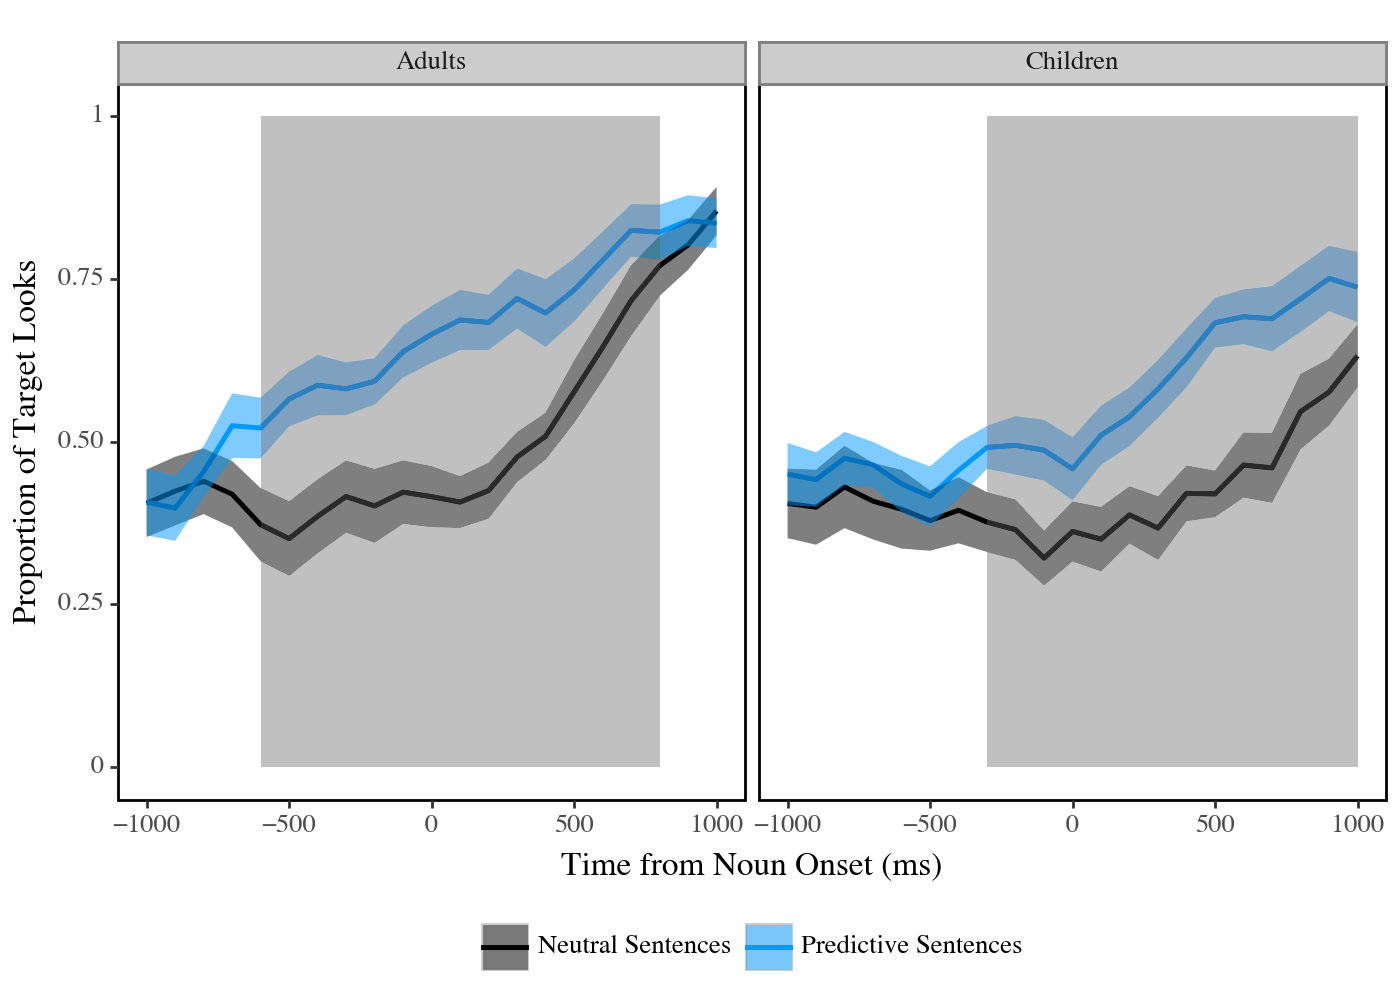

<Figure Size: (700 x 500)>

In [102]:
# time series visualization
import pandas as pd
import numpy as np
df = pd.read_csv("exp1.data.csv")
df.rename(columns={'age.group': 'age_group'}, inplace=True)
# group data, aggregating over trials
df = df.groupby(['subject', 'age_group', 'condition', 'timefromnoun'])['targetlook'].mean().reset_index()
# group data, aggregating over subjects
df = df.groupby(['age_group', 'condition', 'timefromnoun']).agg(
    targetlook = ('targetlook', 'mean'),
    targetlook_se = ('targetlook', 'sem')).reset_index()
# define upper and lower bounds for geom_ribbon
df['upper'] = df['targetlook'] + df['targetlook_se']
df['lower'] = df['targetlook'] - df['targetlook_se']
# relabel conditions for legibility
df['condition'] = np.where(df['condition'] == 'critical', 'Predictive Sentences', 'Neutral Sentences')
# build the plot
from plotnine import *
plot = (
        ggplot(df[(df['timefromnoun'] >= -1000) & (df['timefromnoun'] <= 1000)],
               aes(x = "timefromnoun", y = "targetlook")) +
        geom_line(aes(color="condition"), size = 1) +
        geom_ribbon(aes(ymin="lower", ymax="upper", fill="condition"), alpha = .5) +
        facet_wrap("age_group", nrow=1) +
        geom_rect(df[(df['timefromnoun'] >= -1000) & (df['timefromnoun'] <= 1000) & (df['age_group'] == "Adults")],
                  aes(xmin=-600, xmax=800, ymin=0, ymax=1), fill="grey", alpha=0.01) +
        geom_rect(df[(df['timefromnoun'] >= -1000) & (df['timefromnoun'] <= 1000) & (df['age_group'] == "Children")],
                  aes(xmin=-300, xmax=1000, ymin=0, ymax=1), fill="grey", alpha=0.01) +
        scale_color_manual(values=("#000000", "#0099FF")) +
        scale_fill_manual(values=("#000000", "#0099FF")) +
        scale_x_continuous(name = "Time from Noun Onset (ms)") +
        scale_y_continuous(name = "Proportion of Target Looks") +
        theme_bw(base_family = "Times", base_size=12) +
        theme(panel_grid_major = element_blank(),
              panel_grid_minor = element_blank(),
              panel_border = element_rect(linewidth = 1, color='black'),
              legend_position = 'bottom',
              legend_title = element_blank(),
              figure_size = (7, 5)
              )
)
# display the plot
plot